In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp

In [36]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [37]:
data.describe(include=['object', 'number'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


由简单统计可得：
1. 数据集中性别分布相当。
2. 数据集包含5种种族，其中group C数量最多，占比31.9%
3. 总数据集中父母的学历分6种， 其中some college最多， 占22.6%。
4. 总数据集中有64.2的学生没有完成预科课程。
5. 三门课程中平均分最低的是数学。

## 针对每一个特征，分组分析对学习成绩的影响。

In [46]:
r = data.pivot_table(index=['gender'])
r

,math score,mean,reading score,writing score
gender,,,,
female,63.633205,69.569498,72.608108,72.467181
male,68.728216,65.837483,65.473029,63.311203


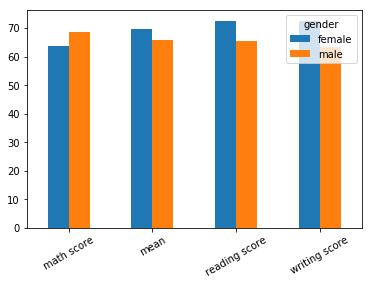

In [54]:
r.T.plot.bar(rot=30)

In [59]:
result = data.pivot_table(index=['parental level of education'])
result = result.sort_values(by='math score')
result

,math score,mean,reading score,writing score
parental level of education,,,,
high school,62.137755,63.096939,64.704082,62.448980
some high school,63.497207,65.108007,66.938547,64.888268
some college,67.128319,68.476401,69.460177,68.840708
associate's degree,67.882883,69.569069,70.927928,69.896396
bachelor's degree,69.389831,71.923729,73.000000,73.381356
master's degree,69.745763,73.598870,75.372881,75.677966


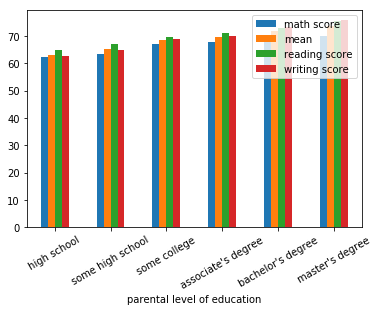

In [60]:
result.plot.bar(rot=30)

In [40]:
data.pivot_table(index=['lunch'])

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [41]:
data.pivot_table(index=['test preparation course'])

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


## 拿到前100名同学，与后100名同学，分析他们的特征分布。

In [42]:
data['mean'] = data.mean(axis=1)
data = data.sort_values(by='mean', ascending=False)
top100 = data.head(100)
tail100 = data.tail(100)

In [43]:
print(top100['gender'].value_counts())
print(tail100['gender'].value_counts())

female    66
male      34
Name: gender, dtype: int64
male      62
female    38
Name: gender, dtype: int64


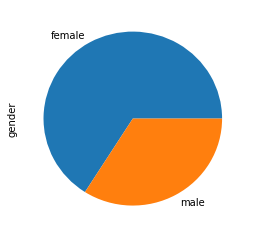

In [63]:
top100['gender'].value_counts().plot.pie(figsize=(4,4))

In [44]:
print(top100['test preparation course'].value_counts())
print(tail100['test preparation course'].value_counts())

completed    57
none         43
Name: test preparation course, dtype: int64
none         82
completed    18
Name: test preparation course, dtype: int64
